# Group L MLG382 Assignment 1

## 1. Problem Statement: 
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while 
filling out the online application form. 
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem identifying the customer segments eligible for 
loan amounts to target these customers specifically. Here they have provided a partial dataset. 

## 2. Hypothesis Generation 

- Income: People with a higher income are more likely to get a loan
- Credit History: People with a good credit history are more likely to pay their loan back
- Loan Term: A higher chance of approval if the time period is not high
- Loan Amount: An amount that is not that high is more likely to be approved 
- Education: People who are educated are more likely to be aware of loans and get approved for them

## 3. Getting the System Ready and Loading Data

#### Loading Packages

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns #For Data Visualization
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading Data

In [10]:
raw = pd.read_csv('./data-for-project-1/raw_data.csv')
validation = pd.read_csv('./data-for-project-1/validation.csv')

train_original = raw.copy()
test_original = validation.copy()


## 4. Understanding the Data

In [11]:
raw.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
validation.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
raw.dtypes #Print the data types for the raw data

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
raw.shape, validation.shape #Seeing how many rows and columns each has

((614, 13), (367, 12))

## Univariate Analysis

In [16]:
#Finding out the number of approved loans (target variable)
raw['Loan_Status'].value_counts(normalize=True) 

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

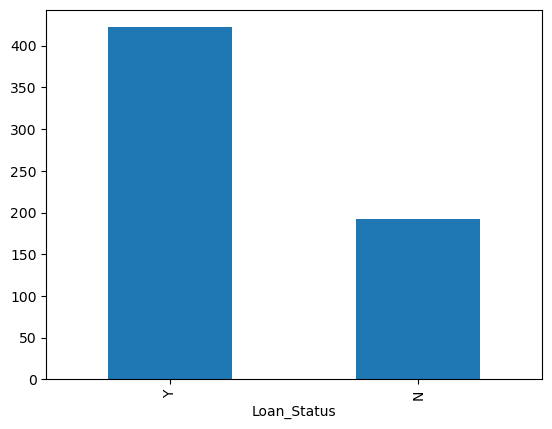

In [17]:
raw['Loan_Status'].value_counts().plot.bar()